In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

In [4]:
zoo = pd.read_csv("D:\Data science\Assignments docs\KNN\Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.shape

(101, 18)

In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


## Exploratory Data Analysis

In [8]:
# Checking for null values in the dataset

In [9]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

#### There are no null values in the datset

In [10]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [11]:
# Checking the unique values in the animal name column

In [12]:
zoo["animal name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [13]:
# Checking number of unique values in each column

In [14]:
zoo.nunique()

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

In [15]:
zoo["animal name"].nunique()

100

In [16]:
zoo_features = [feature for feature in zoo.columns if feature != 'animal name']
zoo_features

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

### Univariate analysis

In [17]:
# Countplot of target variable

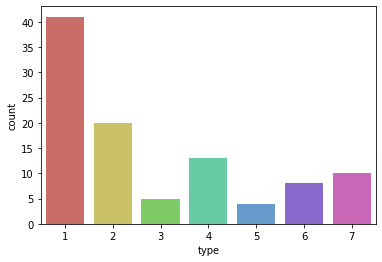

In [18]:
sns.countplot("type", data=zoo, palette="hls")

In [19]:
# Countplots of input variables

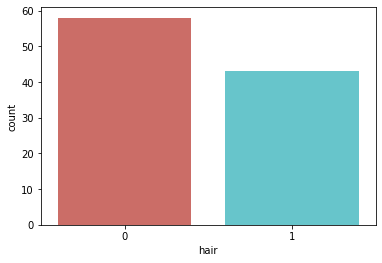

In [20]:
sns.countplot('hair', data=zoo, palette="hls")

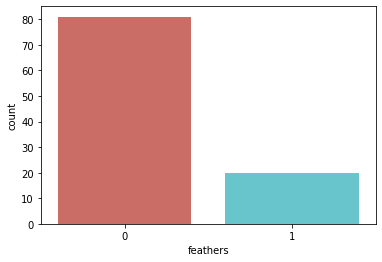

In [21]:
sns.countplot('feathers', data=zoo, palette="hls")

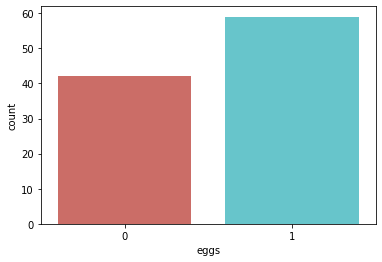

In [22]:
sns.countplot('eggs', data=zoo, palette="hls")

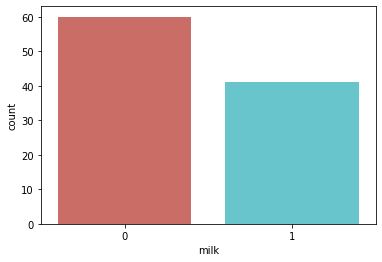

In [23]:
sns.countplot('milk', data=zoo, palette="hls")

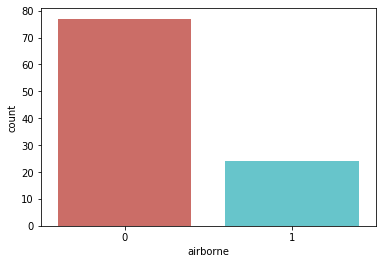

In [24]:
sns.countplot('airborne', data=zoo, palette="hls")

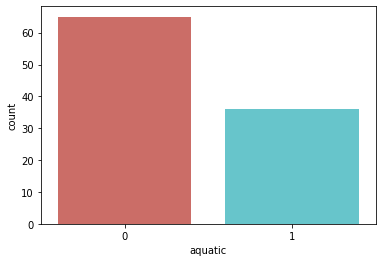

In [25]:
sns.countplot('aquatic', data=zoo, palette="hls")

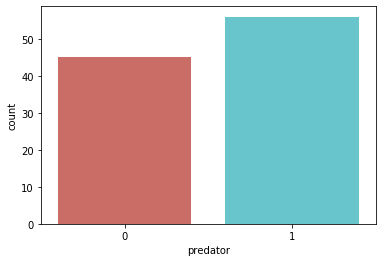

In [26]:
sns.countplot('predator', data=zoo, palette="hls")

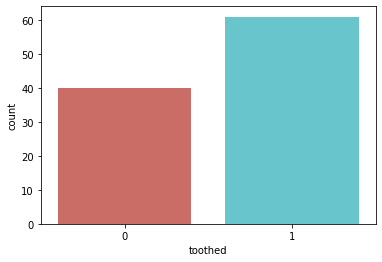

In [27]:
sns.countplot('toothed', data=zoo, palette="hls")

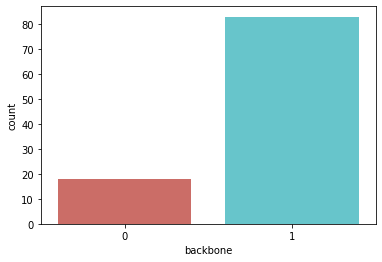

In [28]:
sns.countplot('backbone', data=zoo, palette="hls")

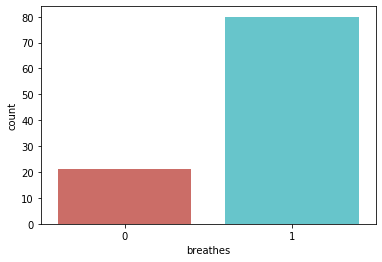

In [29]:
sns.countplot('breathes', data=zoo, palette="hls")

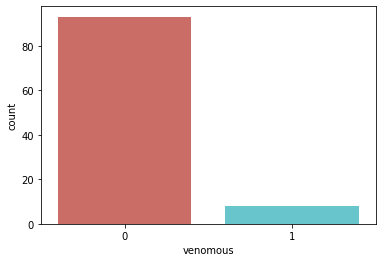

In [30]:
sns.countplot('venomous', data=zoo, palette="hls")

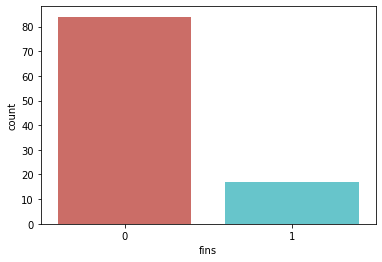

In [31]:
sns.countplot('fins', data=zoo, palette="hls")

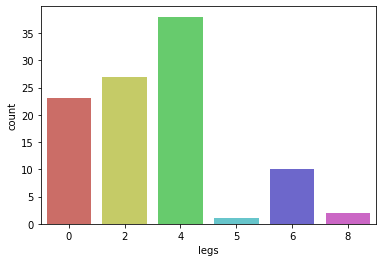

In [32]:
sns.countplot('legs', data=zoo, palette="hls")

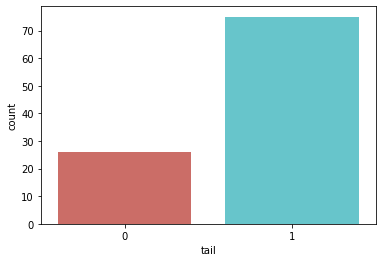

In [33]:
sns.countplot('tail', data=zoo, palette="hls")

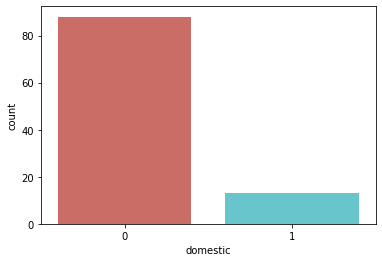

In [34]:
sns.countplot('domestic', data=zoo, palette="hls")

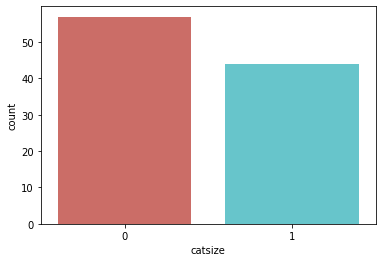

In [35]:
sns.countplot('catsize', data=zoo, palette="hls")

In [36]:
# Dropping the first column "animal name" and output variable "type"

In [37]:
zoo_data = zoo.drop(columns=["animal name","type"])

## Feature scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
scaler.fit(zoo_data)

MinMaxScaler()

In [41]:
scaled_data = pd.DataFrame(scaler.transform(zoo_data), columns=zoo_data.columns )

In [42]:
scaled_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


In [43]:
# Splitting the data into input and output variables

In [44]:
X = scaled_data
y = zoo["type"]

In [45]:
# Splitting the data into train and test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [48]:
x_train.shape

(80, 16)

In [49]:
x_test.shape

(21, 16)

## Model building

In [50]:
from sklearn.neighbors import KNeighborsClassifier as KNC

### Taking k = 3 initially

In [51]:
neigh = KNC(n_neighbors = 3)

In [52]:
model = neigh.fit(x_train,y_train)

In [53]:
# Predicting values

In [54]:
pred_train = model.predict(x_train)

In [55]:
pred_test = model.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [57]:
# Confusion matrix

In [58]:
confusion_matrix(y_train,pred_train)           # for train

array([[32,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  2,  6]], dtype=int64)

In [59]:
confusion_matrix(y_test,pred_test)           # for test

array([[9, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1]], dtype=int64)

In [60]:
# Checking the accuracy

In [61]:
accuracy_score(y_train,pred_train)          # for train

0.9625

In [62]:
accuracy_score(y_test,pred_test)            # for test

0.9047619047619048

### Taking k =5

In [63]:
neigh = KNC(n_neighbors=5)

In [64]:
model = neigh.fit(x_train,y_train)

In [65]:
# Predicting values

In [66]:
pred_train = model.predict(x_train)

In [67]:
pred_test = model.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [69]:
# Confusion matrix

In [70]:
confusion_matrix(y_train,pred_train)           # for train

array([[32,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  2,  6]], dtype=int64)

In [71]:
confusion_matrix(y_test,pred_test)           # for test

array([[9, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1]], dtype=int64)

In [72]:
# Checking the accuracy

In [73]:
accuracy_score(y_train,pred_train)          # for train

0.9625

In [74]:
accuracy_score(y_test,pred_test)            # for test

0.9047619047619048

### Checking the accuracy of the model for different value of k

In [75]:
acc=[]
for i in range(3,20,2):
    neigh=KNC(n_neighbors=i)
    model = neigh.fit(x_train, y_train)
    pred_train=model.predict(x_train)
    pred_test=model.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc=accuracy_score(y_test,pred_test)
    acc.append([train_acc, test_acc])

In [76]:
# Plotting accuracy of the model considering k values from 3 to 20

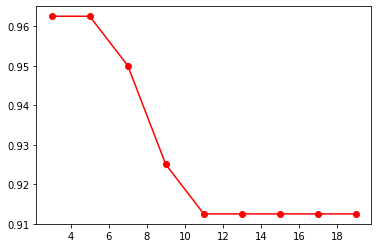

In [77]:
plt.plot(np.arange(3,20,2), [i[0] for i in acc],"ro-")           # for train

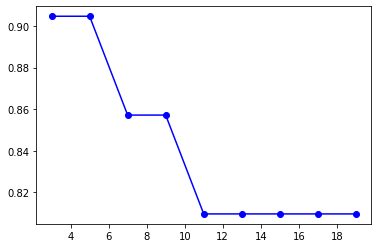

In [78]:
plt.plot(np.arange(3,20,2),[i[1] for i in acc],"bo-")           # for test

#### looking at the above two plots, it is best to take the value of 'k' as 5, which has both high training accuracy and testing accuracy

In [79]:
# Accuracy of the KNN model at k =5 

In [80]:
accuracy_score(y_train,pred_train)          # for train

0.9125

In [81]:
accuracy_score(y_test,pred_test)            # for test

0.8095238095238095